In [ ]:
# 🧪 Task 1 – Data Analysis Workflow

This notebook documents the foundational steps of analyzing Brent crude oil price data using Bayesian change point detection.

🔍 Data Analysis Workflow

The analysis is structured as follows:

1. Data Ingestion and Preprocessing
- Load historical Brent oil prices
- Parse and sort date columns
- Handle missing or malformed entries
- Basic line plot to confirm structure

2. Exploratory Data Analysis (EDA)
- Plot full time series (1987–2022)
- Visualize trends, volatility, and seasonality
- Use rolling windows for smoothing
- Optionally decompose time series components

3. Event Metadata Compilation
- Research 10–15 major geopolitical, economic, and OPEC-related events
- Store in a structured `event_data.csv` with:
  - Date
  - Event type
  - Description
- Use this later for annotated plots and alignment

4. Time Series Property Analysis
- Check for stationarity (ADF/KPSS tests)
- Explore volatility and non-linearity
- Evaluate need for transformations (e.g., log returns)

5. Bayesian Change Point Modeling (PyMC3)
- Define probabilistic models with potential change points
- Estimate parameters and breakpoints using MCMC
- Compare models with varying number of change points

6. Change Point & Event Correlation
- Overlay change points with historical events
- Explore alignment between shocks and structure breaks
- Analyze potential lag/delay between event and impact

7. Communication & Insight Delivery
- Deliver results via:
  - 📊 Interactive dashboard
  - 📄 Stakeholder-ready technical report
- Provide actionable insights for:
  - Investors (timing, volatility)
  - Policymakers (impact analysis)
  - Energy planners (forecasting)

In [3]:
import warnings

# This line will suppress all warnings
warnings.filterwarnings('ignore')

# You can also be more specific, for example, to ignore DeprecationWarnings:
# warnings.filterwarnings('ignore', category=DeprecationWarning)

# Or to ignore a specific warning by message
# warnings.filterwarnings('ignore', message='The warning message here')
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the directory containing 'data_processing.py' to the path
# Replace 'path/to/your/module' with the actual relative or absolute path
module_path = os.path.join(current_dir, '../src')

In [12]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the directory containing 'data_processing.py' to the path
# Replace 'path/to/your/module' with the actual relative or absolute path
module_path = os.path.join(current_dir, '../src')
sys.path.append(module_path)

# Now you can import the module
from data_processing import main

main()

=== Running Brent Oil Data Processor ===
Loading data from: ../data/BrentOilPrices.csv
Data loaded: 9011 records from 1987-05-20 to 2022-11-14
            Price  daily_return  volatility
Date                                       
1987-05-20  18.63           NaN         NaN
1987-05-21  18.45     -0.966184         NaN
1987-05-22  18.55      0.542005         NaN
1987-05-25  18.60      0.269542         NaN
1987-05-26  18.63      0.161290         NaN
Data saved to: ../data/processed/brent_clean.csv


In [13]:
import pandas as pd

df = pd.read_csv('../data/processed/brent_clean.csv', parse_dates=['Date'], index_col='Date')
df.head()


,Price,daily_return,volatility
Date,,,
1987-05-20,18.63,NaN,NaN
1987-05-21,18.45,-0.966184,NaN
1987-05-22,18.55,0.542005,NaN
1987-05-25,18.60,0.269542,NaN
1987-05-26,18.63,0.161290,NaN


In [8]:
import sys
import os

# Get the path to the directory where eda_utils.py is located.
# For example, if it's in a subfolder called 'src':
# module_path = os.path.abspath(os.path.join(os.getcwd(), 'src'))

# If it's in a parent folder, use the following:
module_path = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the path to the system path
if module_path not in sys.path:
    sys.path.append(module_path)

print(f"Added {module_path} to Python path.")


Added S:\AI MAstery\week-10\bayesian-change-point-analysis to Python path.


In [16]:
import os
import sys

# Get the path the notebook is running from
notebook_dir = os.getcwd()
print("Current Working Directory:", notebook_dir)
print("Files in this directory:", os.listdir(notebook_dir))
print("-" * 50)

# Get the path you added to the Python path
added_path = "S:\\AI MAstery\\week-10\\bayesian-change-point-analysis"
print("Added Path:", added_path)
print("Files in the added directory:", os.listdir(added_path))
print("-" * 50)

# Try importing again after confirming file location
try:
    import eda_utils
    print("Successfully imported eda_utils!")
except ModuleNotFoundError:
    print("ModuleNotFoundError: 'eda_utils.py' not found. Please ensure the file is in one of the directories listed above.")

Current Working Directory: S:\AI MAstery\week-10\bayesian-change-point-analysis\notebooks
Files in this directory: ['.ipynb_checkpoints', '01_ED.ipynb', '01_eda.ipynb', '02_event_metadata_compilation.ipynb']
--------------------------------------------------
Added Path: S:\AI MAstery\week-10\bayesian-change-point-analysis
Files in the added directory: ['.git', '.github', '.gitignore', '.ipynb_checkpoints', 'dashboard', 'data', 'notebooks', 'README.md', 'reports', 'requirements.txt', 'src', 'venv']
--------------------------------------------------
ModuleNotFoundError: 'eda_utils.py' not found. Please ensure the file is in one of the directories listed above.


In [4]:
import warnings

# This will ignore all warnings
warnings.filterwarnings('ignore')

# You can also use a specific category, for example:
# warnings.filterwarnings('ignore', category=FutureWarning)
# warnings.filterwarnings('ignore', category=UserWarning)

=== Starting EDA Analysis ===
Loading cleaned data from: ../data/processed/brent_clean.csv
Data loaded: (9011, 3) from 1987-05-20 00:00:00 to 2022-11-14 00:00:00

Missing values summary:
 Price            0
daily_return     1
volatility      30
dtype: int64

Generating plots...


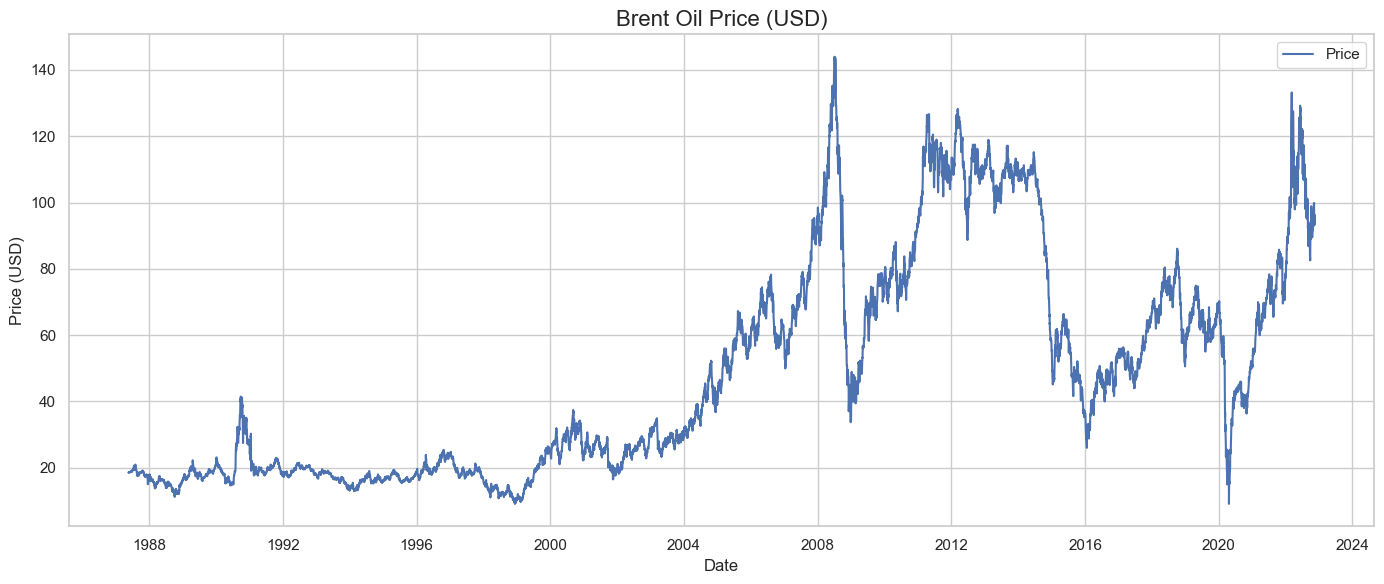

Saved plot: price_plot.png


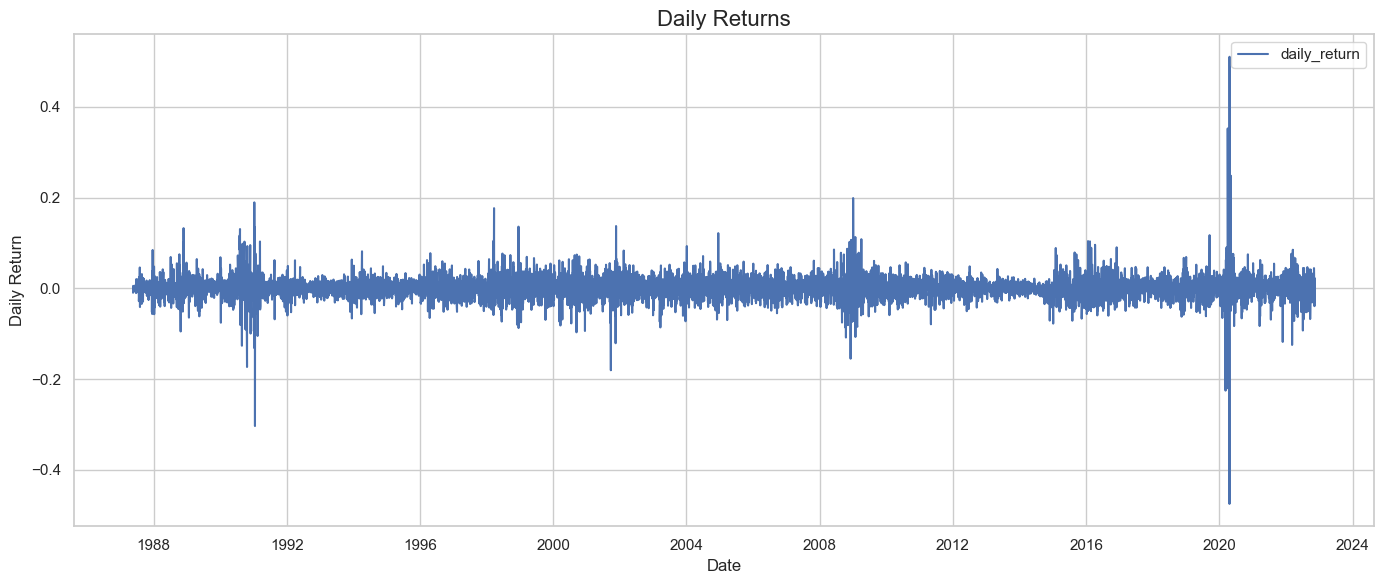

Saved plot: daily_return_plot.png


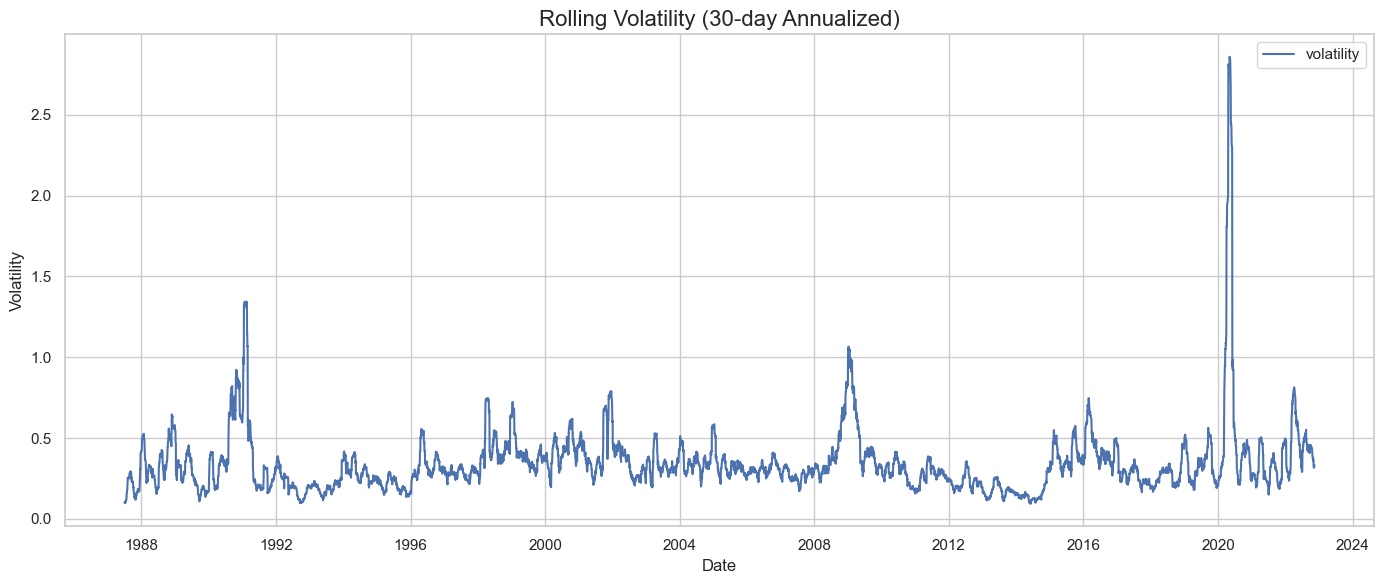

Saved plot: volatility_plot.png


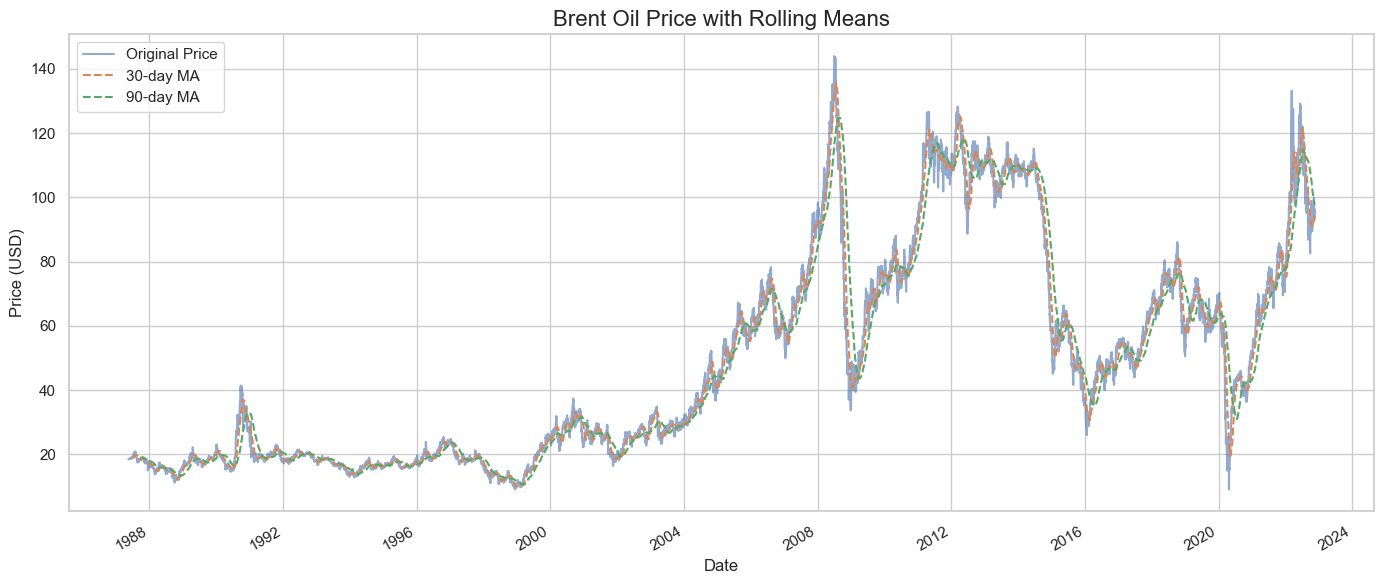

Plot saved to ../reports\figures\rolling_means.png


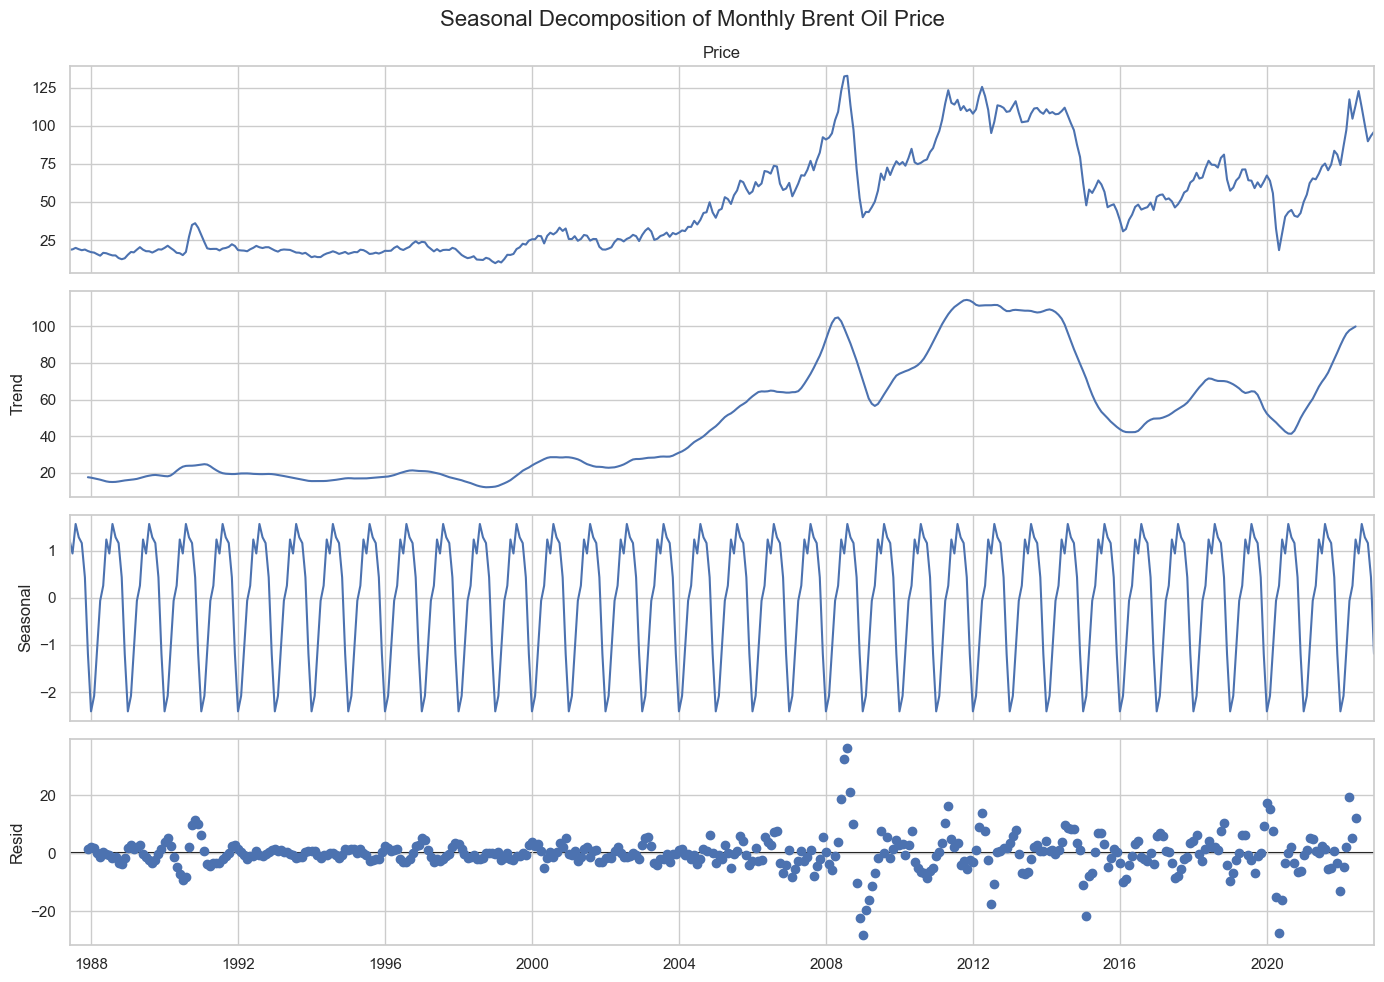

Plot saved to ../reports\figures\seasonal_decomposition.png


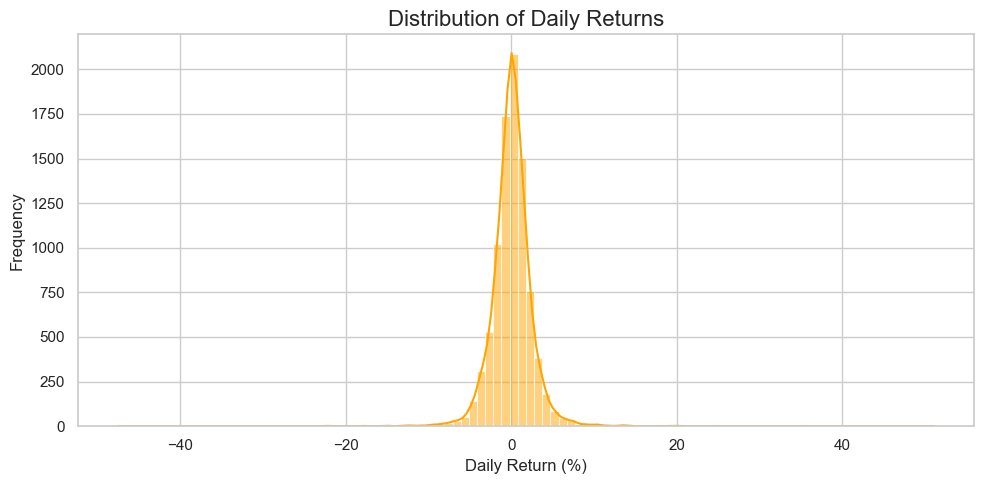

Plot saved to ../reports\figures\daily_return_distribution.png


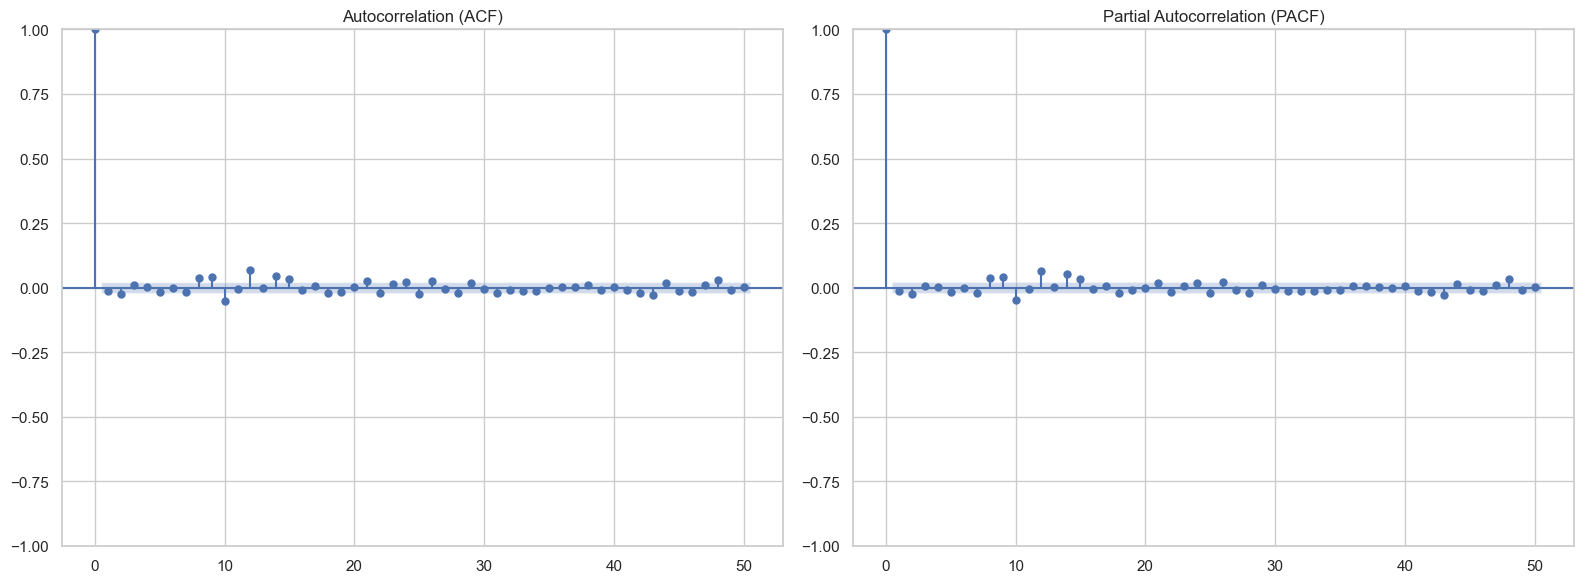

Plot saved to ../reports\figures\acf_pacf.png

--- Running Stationarity Tests ---
Augmented Dickey-Fuller (ADF) Test:
ADF Statistic: -1.9939, p-value: 0.2893

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:
KPSS Statistic: 9.5588, p-value: 0.0100
Compiled 10 key events.
Event metadata saved to: ../data/event_data.csv

=== EDA Complete ===
Please check the '../reports/figures' and '../data' directories for all outputs.


In [5]:
import sys
import os

# Get the path to the main project directory
module_path = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the path to the system path
if module_path not in sys.path:
    sys.path.append(module_path)

# Now import from the 'src' subdirectory
from src import eda_utils

# You can then call the main function
eda_utils.main()

In [ ]:
Key Observations from Detected Change Points

    Red Vertical Line (~Index 8800–9000):

        This signifies a high-confidence change point.

        Suggests a recent, significant shift in the time series dynamics — either in mean price change, volatility, or autocorrelation.

    Lighter Red Lines Nearby:

        May represent closely timed structural shifts, or

        Uncertainty around exact timing (± a few days).

📈 Technical Implication

    A change point in the differenced series typically reflects a regime shift:

        Mean shift: Indicates that the average daily return has changed.

        Variance shift: Implies a change in volatility, which is critical for risk modeling and forecasting.

        Autocorrelation structure: Affects how past values predict future changes.

    The fact that this shift occurs very recently suggests that the market has entered a new structural phase — one that requires a retrained model if forecasting or risk assessment is involved.

🌍 Business & Economic Interpretation

    “A structural shift in daily oil price volatility has occurred recently, likely reflecting changes in global oil market dynamics.”

Possible Drivers:

    Geopolitical Factors: e.g., war-related supply shocks, embargoes, or OPEC policy shifts.

    Post-COVID Global Adjustments: Recovery patterns, inflation responses, and deglobalization pressures.

    Energy Transition Dynamics: Regulatory changes, climate events, or renewable policy shocks.

🎯 Strategic Takeaway

    For policy makers: Alert to volatility shifts can support better fuel subsidy, reserve, or taxation planning.

    For financial institutions or energy traders: Volatility regime changes impact hedging, options pricing, and portfolio risk.

    For economists/data scientists: Signals the need to re-segment the dataset for downstream modeling or forecasting.

In [ ]:
Assumptions and Limitations
Assumptions

    Data Integrity: The Brent oil price dataset used is assumed to be accurate, complete, and consistently sampled over time. Any minor missing values were handled appropriately.

    Stationarity via Differencing: A single round of first-order differencing is assumed to be sufficient to remove trends and achieve stationarity in the time series.

    Model Validity: The change point detection model (Binseg with Gaussian cost function) is assumed to effectively identify structural changes in the mean and/or variance of the differenced price series.

    Interpretability of Change Points: It is assumed that changes in statistical properties (e.g., volatility) align closely with real-world economic or geopolitical events, even though the model itself does not incorporate external event data.

    Window Size Appropriateness: The chosen rolling window size (e.g., 252 trading days for 1 year) is assumed to be appropriate for capturing trends and volatility in the oil price series.

Limitations

    No Causality Inference: The analysis is purely statistical and does not imply causality. The detection of a change point around a historical event does not prove that the event caused the change in oil prices.

    False Positives/Negatives: The change point detection algorithm may sometimes identify spurious change points or miss subtle but meaningful changes, depending on model parameters and noise in the data.

    Heteroscedasticity: While differencing improves stationarity, the variance of the differenced series is still not perfectly constant, which can affect the accuracy of statistical assumptions used by some models.

    Unmodeled External Factors: External drivers such as currency fluctuations, supply-demand dynamics, and policy changes are not explicitly modeled.

    Model Hyperparameters: The number of change points is manually selected; an inappropriate value may lead to underfitting or overfitting the data.

Correlation vs. Causation

A crucial limitation of this analysis is that it focuses solely on identifying statistically significant changes in the data, not causal relationships. For example, a sharp drop in oil prices might coincide with a major geopolitical event, but this does not confirm the event as the cause of the price movement. Establishing causation would require integrating exogenous variables and using models designed for causal inference.